In [17]:
from medmnist import DermaMNIST
import torch
import os
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
if torch.cuda.is_available():
    current_gpu = torch.cuda.current_device()
    gpu_name = torch.cuda.get_device_name(current_gpu)
    print("Current GPU Index:", current_gpu, "Name:", gpu_name)


Current GPU Index: 0 Name: NVIDIA GeForce RTX 3080


In [2]:
test = DermaMNIST(split = 'test', download= os.path.exists('./dermamnist.npz'), root = './') 
train = DermaMNIST(split = 'train', download= os.path.exists('./dermamnist.npz'), root = './') 
val = DermaMNIST(split = 'val', download= os.path.exists('./dermamnist.npz'), root = './') 

Using downloaded and verified file: ./dermamnist.npz
Using downloaded and verified file: ./dermamnist.npz
Using downloaded and verified file: ./dermamnist.npz


In [12]:
val

Dataset DermaMNIST (dermamnist)
    Number of datapoints: 1003
    Root location: ./
    Split: val
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0

In [13]:
test

Dataset DermaMNIST (dermamnist)
    Number of datapoints: 2005
    Root location: ./
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0

In [14]:
train

Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: ./
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0

In [50]:
image, label  = test[1] 
image 


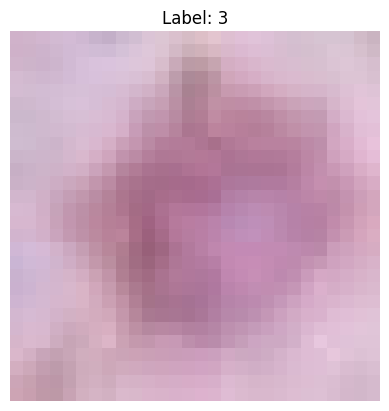

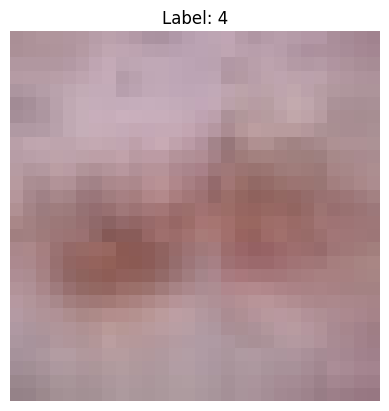

In [30]:
image, label = test[1]  


plt.imshow(image)
plt.title(f"Label: {label[0]}")  
plt.axis('off')  
plt.show()

image, label = test[2]  


plt.imshow(image)
plt.title(f"Label: {label[0]}")  
plt.axis('off')  
plt.show()

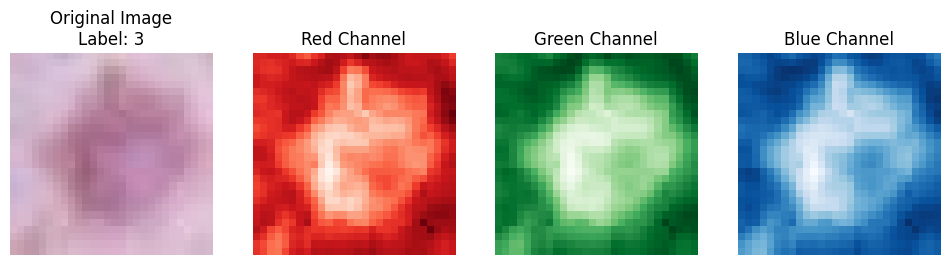

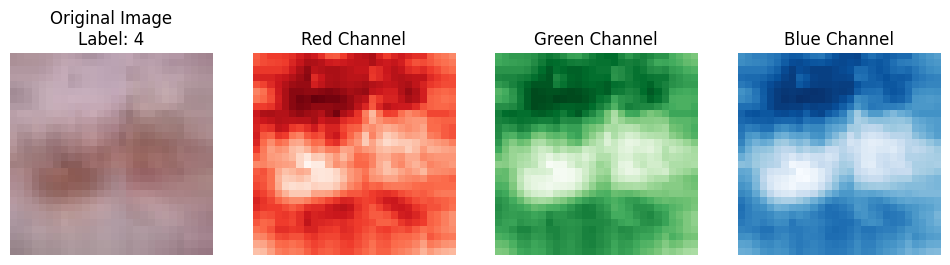

In [32]:
def show_rgb_channels(image, label):
    # Splitting the image into R, G, B channels
    R, G, B = image.split()

    # Plotting each channel
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title(f"Original Image\nLabel: {label[0]}")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(R, cmap='Reds')
    plt.title("Red Channel")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(G, cmap='Greens')
    plt.title("Green Channel")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(B, cmap='Blues')
    plt.title("Blue Channel")
    plt.axis('off')

    plt.show()


# Display RGB channels for test[1]
image, label = test[1]
show_rgb_channels(image, label)

# Display RGB channels for test[2]
image, label = test[2]
show_rgb_channels(image, label)

In [33]:
help(test)

Help on DermaMNIST in module medmnist.dataset object:

class DermaMNIST(MedMNIST2D)
 |  DermaMNIST(split, transform=None, target_transform=None, download=False, as_rgb=False, root='C:\\Users\\Juan\\.medmnist')
 |  
 |  Method resolution order:
 |      DermaMNIST
 |      MedMNIST2D
 |      MedMNIST
 |      torch.utils.data.dataset.Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  __parameters__ = ()
 |  
 |  flag = 'dermamnist'
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from MedMNIST2D:
 |  
 |  __getitem__(self, index)
 |      return: (without transform/target_transofrm)
 |          img: PIL.Image
 |          target: np.array of `L` (L=1 for single-label)
 |  
 |  montage(self, length=20, replace=False, save_folder=None)
 |  
 |  save(self, folder, postfix='png', write_csv=True)
 |  
 |  -------------------------------------------------

In [3]:
from MyNetworkTemplate import MyNetwork

image, label = test[1]

# Transform the PIL image to a tensor
transform = transforms.Compose([
    transforms.Resize((28, 28)),  
    transforms.ToTensor()
])
image = transform(image).unsqueeze(0)  # Add batch dimension


In [4]:
from MyNetworkTemplate import MyNetwork
model = MyNetwork(3,3)

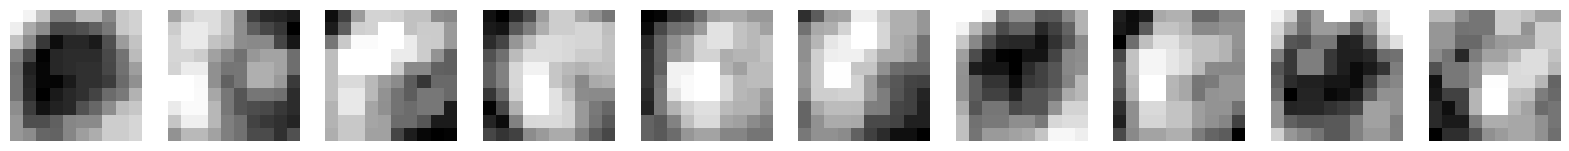

In [5]:
output = model.conv(image)
output = output[0].detach().numpy()  # Remove batch dimension and convert to numpy
fig, axs = plt.subplots(1, output.shape[0], figsize=(20, 20))
for i in range(output.shape[0]):
    axs[i].imshow(output[i], cmap='gray')
    axs[i].axis('off')
plt.show()

In [6]:
output.shape

(10, 10, 10)

In [8]:
import torch.utils.data as data
batchSize = 100
trainLoader = data.DataLoader(dataset=train, batch_size=batchSize, shuffle=True)

enumerate(trainLoader)

In [12]:
from medmnist import INFO
nChannels = INFO['dermamnist']['n_channels']
nChannels

3

In [20]:
from MyNetworkTemplate import MyNetwork
import torch.utils.data as data
DataClass = DermaMNIST

from medmnist import INFO
nClasses = len(INFO['dermamnist']['label'])

#Training 

# Transforming images to Torch Tensor and Normalizing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0], std=[1])
])

## Obtaining the training, validation and test datasets
trainingData = DataClass(split='train', transform=data_transform,  download= os.path.exists('./dermamnist.npz'), root = './')
validationData = DataClass(split='val', transform=data_transform, download= os.path.exists('./dermamnist.npz'), root = './')
testData = DataClass(split='test', transform=data_transform,  download= os.path.exists('./dermamnist.npz'), root = './')

## This code will show a preview of the images
#a = trainingData.montage(length=5)
#plt.imshow(a)
#plt.show()

## Configuring the batch size and creating data loaders
batchSize = 100
trainLoader = data.DataLoader(dataset=trainingData, batch_size=batchSize, shuffle=True)
validationLoader = data.DataLoader(dataset=validationData, batch_size=batchSize, shuffle=True)
#testLoader = data.DataLoader(dataset=testData, batch_size=batchSize, shuffle=False)

model = MyNetwork(nChannels, nClasses)
model.trainModel(trainLoader, validationLoader)


Using downloaded and verified file: ./dermamnist.npz
Using downloaded and verified file: ./dermamnist.npz
Using downloaded and verified file: ./dermamnist.npz
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Juan\anaconda3\envs\cudapy\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Juan\AppData\Local\Temp\ipykernel_14084\2092959434.py", line 33, in <module>
    model.trainModel(trainLoader, validationLoader)
  File "c:\Users\Juan\Documents\GitHub\ML\p7\MyNetworkTemplate.py", line 59, in trainModel
  File "c:\Users\Juan\anaconda3\envs\cudapy\lib\site-packages\torch\utils\data\dataloader.py", line 628, in __next__
    data = self._next_data()
  File "c:\Users\Juan\anaconda3\envs\cudapy\lib\site-packages\torch\utils\data\dataloader.py", line 671, in _next_data
    data = self._dataset_fetcher.fetch(index)  # may raise StopIteration
  File "c:\Users\Juan\anaconda3\envs\cudapy\lib\site-packages\torch\utils\data\_utils\fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "c:\Users\Juan\anaconda3\envs